<a href="https://colab.research.google.com/github/takky0330/Colab/blob/main/%E5%A4%A7%E5%90%8D%E8%A1%8C%E5%88%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **＃準備**

In [1]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
from scipy import linalg

In [2]:
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 21 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 2s (4,731 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 144611 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ip

In [3]:
fpath='/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
fontsize = 50
font = ImageFont.truetype(fpath, fontsize)

# **＃元画像（**"大名行列.png"）の生成

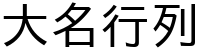

In [4]:
LX = 200
LY = fontsize
img  = Image.new('L', (LX,LY),color=255)
draw = ImageDraw.Draw(img)
draw.text((0,0), "大名行列", fill=0, font=font)
img

In [5]:
data = np.array(img.getdata()).reshape((LY,LX))

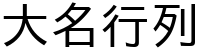

In [6]:
Image.fromarray(np.uint8(data))

In [7]:
np.linalg.matrix_rank(data) # => 47

47

In [8]:
u, s, v = linalg.svd(data)

In [9]:
print(f"u: {u.shape}")
print(f"s: {s.shape}")
print(f"v: {v.shape}")

u: (50, 50)
s: (50,)
v: (200, 200)


# **＃特異値分解と圧縮（r=10）**

In [10]:
r = 10
ur = u[:, :r]
sr = np.diag(np.sqrt(s[:r]))
vr = v[:r, :]
A10 = ur @ sr
B10 = sr @ vr

In [11]:
print(f"A10: {A10.shape}")
print(f"B10: {B10.shape}")
print(f"AB10: {(A10 @ B10).shape}")

A10: (50, 10)
B10: (10, 200)
AB10: (50, 200)


In [12]:
np.linalg.matrix_rank(A10 @ B10) # => 10

10

## ＃　圧縮率

In [13]:
print((A10.size + B10.size)/data.size) 

0.25


## ＃　圧縮後（r=10）の Save

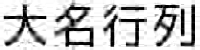

In [14]:
b10 = np.asarray(A10 @ B10)
b10 = np.clip(b10, 0, 255)
img10 = Image.fromarray(np.uint8(b10))
img.save('大名行列10.jpg')
img.save('大名行列10.png')
img10.save('大名行列10.bmp')
img10

# **＃ 圧縮（r=3）**

In [15]:
r = 3
ur = u[:, :r]
sr = np.diag(np.sqrt(s[:r]))
vr = v[:r, :]
A3 = ur @ sr
B3 = sr @ vr
b3 = np.asarray(A3 @ B3)
b3 = np.clip(b3, 0, 255)

## ＃　圧縮後（r=3）の Save

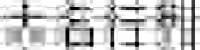

In [16]:
img3 = Image.fromarray(np.uint8(b3))
img.save('大名行列3.jpg')
img.save('大名行列3.png')
img3.save('大名行列3.bmp')
img3

## ＃　圧縮率

In [17]:
print((A3.size + B3.size)/data.size)

0.075


## ＃　元画像の Save

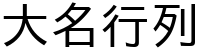

In [18]:
img.save('大名行列.jpg')
img.save('大名行列.png')
img.save('大名行列.bmp')
img

# **＃ 確認**

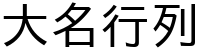

In [19]:
img

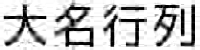

In [20]:
img10

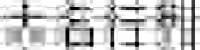

In [21]:
img3

## **＃ 圧縮率**
### **おまけ… 圧縮が一番小さい r=50 （圧縮できていない）場合の圧縮率も確認**

In [31]:
print("r = 10 の 圧縮率 　：　", (A10.size + B10.size)/data.size, " %") 
print("r =   3 の 圧縮率 　：　", (A3.size + B3.size)/data.size, " %") 
r = 50
ur = u[:, :r]
sr = np.diag(np.sqrt(s[:r]))
vr = v[:r, :]
A50 = ur @ sr
B50 = sr @ vr
print("r = 50 の 圧縮率 　：　", (A50.size + B50.size)/data.size, " %　　　# 増えてる…") 
r = 47
ur = u[:, :r]
sr = np.diag(np.sqrt(s[:r]))
vr = v[:r, :]
A47 = ur @ sr
B47 = sr @ vr
print("r = 47 の 圧縮率 　：　", (A47.size + B47.size)/data.size, " %　　　# 増えてる…") 
r = 40
ur = u[:, :r]
sr = np.diag(np.sqrt(s[:r]))
vr = v[:r, :]
A40 = ur @ sr
B40 = sr @ vr
print("r = 40 の 圧縮率 　：　", (A40.size + B40.size)/data.size, " %　　　# 増えてない…") 

r = 10 の 圧縮率 　：　 0.25  %
r =   3 の 圧縮率 　：　 0.075  %
r = 50 の 圧縮率 　：　 1.25  %　　　# 増えてる…
r = 47 の 圧縮率 　：　 1.175  %　　　# 増えてる…
r = 40 の 圧縮率 　：　 1.0  %　　　# 増えてない…


###　r=50 の時の画像

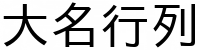

In [23]:
b50 = np.asarray(A50 @ B50)
b50 = np.clip(b50, 0, 255)
Image.fromarray(np.uint8(b50))

###　r=40 の時の画像

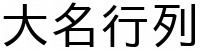

In [32]:
b40 = np.asarray(A40 @ B40)
b40 = np.clip(b40, 0, 255)
Image.fromarray(np.uint8(b40))

## **＃ データサイズ**

In [24]:
import sys
print("元画像 : ", data.size)
print("r = 10 : ", b10.size)
print("r =   3 : ", b3.size)

元画像 :  10000
r = 10 :  10000
r =   3 :  10000


## **＃ ファイルサイズ**

In [25]:
!ls -al | grep 大名行列

-rw-r--r-- 1 root root 11078 Oct 29 07:18 大名行列10.bmp
-rw-r--r-- 1 root root  3387 Oct 29 07:18 大名行列10.jpg
-rw-r--r-- 1 root root  1919 Oct 29 07:18 大名行列10.png
-rw-r--r-- 1 root root 11078 Oct 29 07:18 大名行列3.bmp
-rw-r--r-- 1 root root  3387 Oct 29 07:18 大名行列3.jpg
-rw-r--r-- 1 root root  1919 Oct 29 07:18 大名行列3.png
-rw-r--r-- 1 root root 11078 Oct 29 07:18 大名行列.bmp
-rw-r--r-- 1 root root  3387 Oct 29 07:18 大名行列.jpg
-rw-r--r-- 1 root root  1919 Oct 29 07:18 大名行列.png


# **文字を変えてランクを調べてみる！**

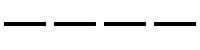

In [37]:
LX = 200
LY = fontsize
img  = Image.new('L', (LX,LY),color=255)
draw = ImageDraw.Draw(img)
draw.text((0,0), "一一一一", fill=0, font=font)
img

In [38]:
data1 = np.array(img.getdata()).reshape((LY,LX))

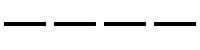

In [39]:
Image.fromarray(np.uint8(data1))

In [40]:
np.linalg.matrix_rank(data1) 

2